In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.value_counts('Gender')

,count
Gender,
Male,5457
Female,4543


In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
  df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [13]:
x=df.drop(columns=['Exited'])
y=df['Exited']
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,random_state=1)


In [14]:
xtr.shape

(8000, 11)

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtr=sc.fit_transform(xtr)
xte=sc.transform(xte)

In [16]:
xtr

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))#firsst hidden layyer creation
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['Accuracy'])

In [35]:
history = model.fit(xtr,ytr,epochs=15,validation_split=0.2)

Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.8662 - loss: 0.3297 - val_Accuracy: 0.8512 - val_loss: 0.3365
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8704 - loss: 0.3169 - val_Accuracy: 0.8537 - val_loss: 0.3369
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.8675 - loss: 0.3178 - val_Accuracy: 0.8587 - val_loss: 0.3369
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8710 - loss: 0.3163 - val_Accuracy: 0.8550 - val_loss: 0.3377
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8651 - loss: 0.3226 - val_Accuracy: 0.8569 - val_loss: 0.3374
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8710 - loss: 0.3218 - val_Accuracy: 0.8562 - val_loss: 0.3372
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8696 - loss: 0.3221 - val_Accuracy: 0.8550 - val_loss: 0.3379
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8634 - loss: 0.3242 - val_Accuracy: 0.

In [36]:
#checking the weights and biases
#Here we have 36 weights and 3 biases that is input to hidden
model.layers[0].get_weights()

[array([[ 2.43806511e-01, -1.11212052e-01,  2.60612994e-01,
         -8.72198269e-02,  4.86368865e-01, -7.58435950e-02,
         -9.44004133e-02, -1.62109137e-01, -4.14324515e-02,
         -1.79294601e-01, -4.63213563e-01],
        [-2.15989482e-02, -6.44568086e-01, -3.30466181e-01,
         -5.19119382e-01, -2.57472187e-01,  8.01100135e-01,
          8.34902287e-01, -1.54023077e-02, -3.19923669e-01,
          5.31049490e-01, -2.89177239e-01],
        [ 1.95387632e-01,  3.14102136e-02,  9.22907367e-02,
          8.83433409e-03, -2.16483712e-01,  4.65401560e-02,
          3.72058526e-02,  1.46448493e-01,  6.32466823e-02,
          2.02014044e-01, -1.29063889e-01],
        [-1.53952971e-01, -2.31298223e-01, -6.22439981e-01,
         -4.43052888e-01,  5.58086857e-02,  2.50439215e-02,
         -4.21841294e-01,  9.25208777e-02, -4.86944348e-01,
         -2.19599783e-01,  6.10789061e-01],
        [ 2.93299146e-02,  5.58469370e-02, -3.68955940e-01,
         -4.69585717e-01,  3.89029622e-01,  

In [37]:
#here we have weights of 2 nd layes that is hidden to output
model.layers[1].get_weights()

[array([[-0.01247775, -0.4386575 , -0.35105285, -0.01574655,  0.08080274,
          0.30532402, -0.41549948,  0.17937945,  0.2160466 ,  0.02745458,
          0.629553  ],
        [-0.279369  ,  0.18419099, -0.7059759 ,  0.41559967,  0.13421394,
         -0.40493447, -0.61376786,  0.22116202, -0.04559381, -0.28683436,
          0.19308898],
        [-0.92039376, -0.6205164 , -0.01078194,  0.5311077 , -0.3072839 ,
          0.4707513 , -0.1771624 ,  0.51722544,  0.66275406, -0.39888737,
         -0.07899961],
        [-0.12058435,  0.03890973,  0.24506597,  0.31322393, -0.04025972,
         -0.6961506 , -0.19957165,  0.6720542 ,  0.11557185,  0.01618591,
          0.562402  ],
        [ 0.07980849,  0.5960102 ,  0.00487793, -0.07500257,  0.3089173 ,
         -0.5787915 ,  0.29808515, -0.26219204,  0.40434256,  0.59517103,
          0.397306  ],
        [ 0.3402806 , -0.74074435, -0.99901366,  0.85599107, -0.6356451 ,
         -0.51663977,  0.3994981 , -0.4889285 , -0.65180665,  0.2538975

In [38]:
model.layers[2].get_weights()

[array([[ 1.0063478 ],
        [ 0.4665054 ],
        [ 1.2329679 ],
        [-0.4061519 ],
        [-1.1179638 ],
        [ 1.0162946 ],
        [ 1.1222241 ],
        [ 0.914627  ],
        [-0.35810214],
        [ 0.79559124],
        [-0.40961623]], dtype=float32),
 array([-0.27665803], dtype=float32)]

In [39]:
y_log=model.predict(xte)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [40]:
y_pred = np.where(y_log > 0.5,1,0)#jaha par y_log>0.5 hai to print 1 nahi to 0

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(yte,y_pred)

0.8615

In [42]:
history.history

{'Accuracy': [0.8668749928474426,
  0.8696874976158142,
  0.8671875,
  0.867968738079071,
  0.8659374713897705,
  0.8700000047683716,
  0.8676562309265137,
  0.8667187690734863,
  0.8685937523841858,
  0.8668749928474426,
  0.867968738079071,
  0.8690624833106995,
  0.8689062595367432,
  0.8693749904632568,
  0.8690624833106995],
 'loss': [0.32460495829582214,
  0.3240427076816559,
  0.3240893483161926,
  0.3241102993488312,
  0.32373934984207153,
  0.32366952300071716,
  0.3235553801059723,
  0.3227405846118927,
  0.32256370782852173,
  0.3226974904537201,
  0.32205674052238464,
  0.322192907333374,
  0.3218121826648712,
  0.32186558842658997,
  0.32131606340408325],
 'val_Accuracy': [0.8512499928474426,
  0.8537499904632568,
  0.8587499856948853,
  0.8550000190734863,
  0.8568750023841858,
  0.856249988079071,
  0.8550000190734863,
  0.8606250286102295,
  0.8543750047683716,
  0.8537499904632568,
  0.859375,
  0.856249988079071,
  0.859375,
  0.8581249713897705,
  0.856249988079071],

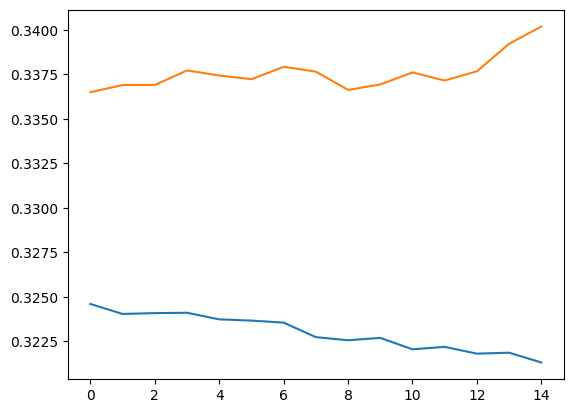

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

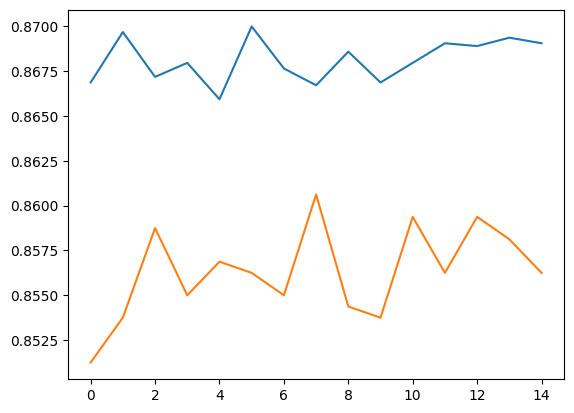

In [49]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])

In [ ]:
plt.plot(history.history['val_accuracy'])